In [111]:
# Package Importation

In [112]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# Importing data set of Interest

In [114]:
df = pd.read_csv("winequality-red.csv",delimiter=";")

In [115]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


A mapping dictionary will be created that maps the quality values from 0 to 5   
usinge the map function of pandas with any dictionary to convert the values   
in a given column to values in the dictionary    

In [116]:
quality_map = {3: 0,4: 1,5: 2,6: 3,7: 4,8: 5}
df.loc[:, "quality"] = df.quality.map(quality_map)

In [118]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [119]:
df.tail(300)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,0
1300,5.2,0.645,0.00,2.15,0.080,15.0,28.0,0.99444,3.78,0.61,12.5,3
1301,6.7,0.860,0.07,2.00,0.100,20.0,57.0,0.99598,3.60,0.74,11.7,3
1302,9.1,0.370,0.32,2.10,0.064,4.0,15.0,0.99576,3.30,0.80,11.2,3
1303,8.0,0.280,0.44,1.80,0.081,28.0,68.0,0.99501,3.36,0.66,11.2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.00,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.20,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.30,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.00,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [120]:
y = df.quality
X = df.drop('quality',axis=1) # Dropping the deepending variable from the features to be trained

In [121]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y,test_size=0.3)

In [122]:
clf = tree.DecisionTreeClassifier(max_depth=3)
cols = ['fixed acidity','volatile acidity','citric acid',
        'residual sugar','chlorides','free sulfur dioxide',
        'total sulfur dioxide', 'density','pH','sulphates','alcohol']

clf.fit(X_train[cols], y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [123]:
# # Generate predictions on the training set
train_predictions = clf.predict(X_train)
# calculate the accuracy of predictions on training data set
train_accuracy = metrics.accuracy_score(y_train, train_predictions)
print("The Training Accuracy is : ",train_accuracy)

The Training Accuracy is :  0.5933869526362824


In [124]:
# Generate predictions on the test set
test_predictions = clf.predict(X_cv)
# calculate the accuracy of predictions on test data set
test_accuracy = metrics.accuracy_score(y_cv, test_predictions)
print("The Testing Accuracy is :", test_accuracy)

The Testing Accuracy is : 0.54375


The training and test accuracies are found to be 59.3% and 54.4%. Now we    
increase the max_depth to 7 and repeat the process.   
we have used accuracy, mainly because it is the most straightforward metric .    

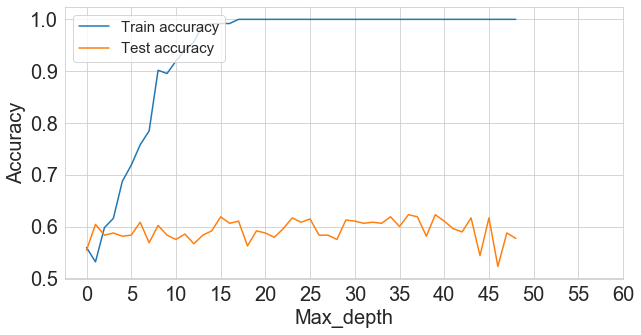

In [136]:
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

train_accuracies = []
test_accuracies = []

# Iterate over a few depth values
for depth in range(1, 50):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    X_train, X_cv, y_train, y_cv = train_test_split(X, y,test_size=0.3)
    
    # fit the model on given features
    clf.fit(X_train, y_train)
    
    # Create training & test predictions 
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_cv)
    
    # Calculate training & test accuracies for each iteration
    train_accuracy = metrics.accuracy_score(y_train, train_predictions)
    test_accuracy = metrics.accuracy_score(y_cv, test_predictions)
    
    # Append accuracies for each iteration
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
# creating two plots using matplotlib and seaborn together to visualize.
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="Train accuracy")
plt.plot(test_accuracies, label="Test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 65, 5))
plt.xlabel("Max_depth", size=20)
plt.ylabel("Accuracy", size=20)
plt.show()

In [ ]:
# Example of Overfitting

We can see that the best score for test data is obtained from the above plot when max_depth has a value of 15. As we keep increasing the value of the  max_depth parameter, test accuracy remains the same or gets worse, but the training accuracy keeps increasing. Meaning that the decision tree model keeps learning about the training data better and better with an increase in max_depth, but the performance on test data is poor and does not improve at all.

The model fits perfectly on the training set and performs poorly when it comes to
the test set. This means that the model will learn the training data well but will not
generalize on unseen samples. 